In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Считываем данные из экселевского файла:
data = pd.read_excel('Aeroflot_data.xlsx')

In [6]:
# Смотрим на формат данных:
data.head()

,Period,Revenue Passenger Kilometers_million RPK,incl. International_million RPK,Domestic_million RPK,Revenue Tonne Kilometers_million RTK,incl. International_million RTK,Domestic_million RTK,Passengers carried_thousands,incl. International_thousands,Domestic_thousands,...,Domestic_million ATK,Available Seat Kilometers_million ASK,incl. International_million ASK,Domestic_million ASK,Revenue Cargo Tonne Kilometers_million TKM,incl. International_million TKM,Domestic_million TKM,Revenue flights_flights,incl. International_flights,Domestic_flights
0,January 2015,6831.3,4073.2,2758.1,655.2,388.9,266.3,2656.3,1208.2,1448.1,...,438.9,9416.9,5629.3,3787.6,40.4,22.3,18.1,NaN,NaN,NaN
1,February 2015,6250.6,3694.7,2555.9,609.1,359.1,250.0,2448.8,1077.8,1371.0,...,392.2,8416.8,4982.2,3434.6,46.6,26.6,19.9,NaN,NaN,NaN
2,March 2015,7154.2,4216.0,2938.2,697.9,411.5,286.4,2836.7,1241.1,1595.6,...,446.6,9567.5,5633.7,3933.8,54.1,32.1,22.0,NaN,NaN,NaN
3,April 2015,7171.4,4003.2,3168.2,708.0,396.7,311.4,2924.7,1215.6,1709.2,...,506.2,9643.0,5283.7,4359.3,62.6,36.4,26.2,NaN,NaN,NaN
4,May 2015,7919.5,4268.3,3651.2,769.7,420.1,349.6,3260.7,1334.5,1926.2,...,568.5,10466.4,5618.0,4848.4,57.0,36.0,21.0,NaN,NaN,NaN


In [7]:
data.shape

(61, 38)

In [8]:
data.dtypes

Period                                         object
Revenue Passenger Kilometers_million RPK      float64
incl. International_million RPK               float64
Domestic_million RPK                          float64
Revenue Tonne Kilometers_million RTK          float64
incl. International_million RTK               float64
Domestic_million RTK                          float64
Passengers carried_thousands                  float64
incl. International_thousands                 float64
Domestic_thousands                            float64
Mail carried_tonnes                           float64
incl. International_tonnes                    float64
Domestic_tonnes                               float64
Cargo carried_tonnes                          float64
incl. International_tonnes.1                  float64
Domestic_tonnes.1                             float64
Cargo and mail carried_tonnes                 float64
incl. International_tonnes.2                  float64
Domestic_tonnes.2           

In [9]:
# Берем для анализа 1 параметр - суммарный объем пассажироперевозок
# (внутренних и международных):
pass_data = data['Passengers carried_thousands']

In [10]:
# Преобразуем индекс в формат datetime с ежемесячной частотой:
pass_data.index = pd.date_range(start='2015-01-01', periods=len(data), freq='M')

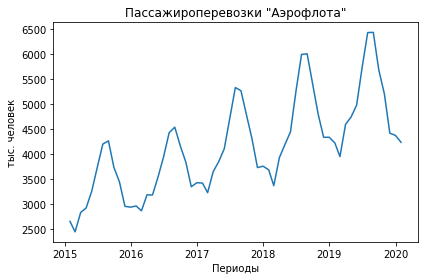

In [11]:
plt.plot(pass_data)
plt.title('Пассажироперевозки "Аэрофлота"')
plt.xlabel('Периоды')
plt.ylabel('тыс. человек')
plt.tight_layout()

In [12]:
# Декомпозиция данных:
decomposition = seasonal_decompose(pass_data)

observed = decomposition.observed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

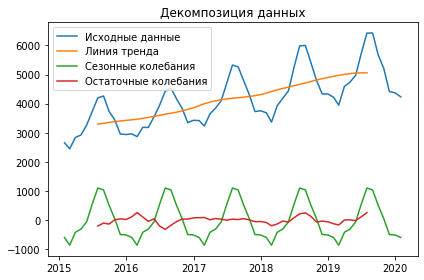

In [13]:
plt.plot(pass_data.index, observed, label='Исходные данные')
plt.plot(pass_data.index, trend, label='Линия тренда')
plt.plot(pass_data.index, seasonal, label='Сезонные колебания')
plt.plot(pass_data.index, residual, label='Остаточные колебания')
plt.legend()
plt.title('Декомпозиция данных')
plt.tight_layout()

Text(0.5, 1.0, 'ACF')

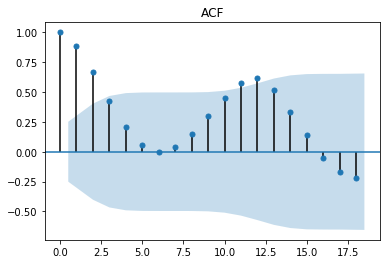

In [14]:
# Графики автокорреляции
plot_acf(pass_data)
plt.title('ACF')

Text(0.5, 1.0, 'PACF')

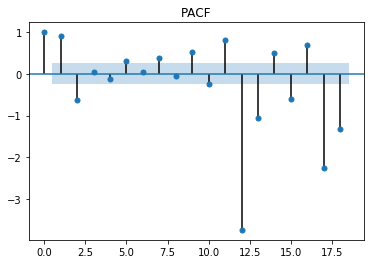

In [15]:
plot_pacf(pass_data)
plt.title('PACF')

In [16]:
# Создаем модель SARIMA:
model_sarima = SARIMAX(pass_data,
                       order=(1, 2, 0),
                       seasonal_order=(1, 2, 0, 12))

In [17]:
decomposition = model_sarima.fit(disp=False)
decomposition.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:       Passengers carried_thousands   No. Observations:                   61
Model:             SARIMAX(1, 2, 0)x(1, 2, 0, 12)   Log Likelihood                -234.387
Date:                            Mon, 02 Mar 2020   AIC                            474.774
Time:                                    15:16:25   BIC                            479.440
Sample:                                01-31-2015   HQIC                           476.385
                                     - 01-31-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5288      0.151     -3.495      0.000      -0.825      -0.232
ar.S.L12      -0.3852      0.271     -1.421      0.155      -0.916       0.146
sigma2      3.734e+04   1.17e+04      3.187      0.001    1.44e+04    6.03e+04
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 2.45
Prob(Q):                               nan   Prob(JB):                         0.29
Heteroskedasticity (H):               1.13   Skew:                            -0.64
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

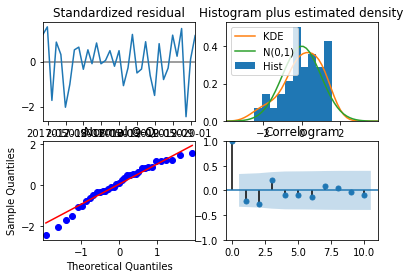

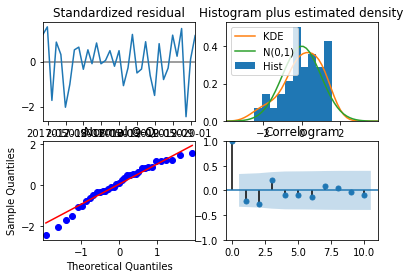

In [18]:
# Визуализируем параметры модели:
decomposition.plot_diagnostics()

In [19]:
# Прогноз на 12 месяцев вперед:
prediction = decomposition.get_forecast(steps=12)

In [20]:
# Доверительные интервалы прогноза:
prediction_int = prediction.conf_int()

Text(0.5, 1.0, 'Прогноз SARIMA')

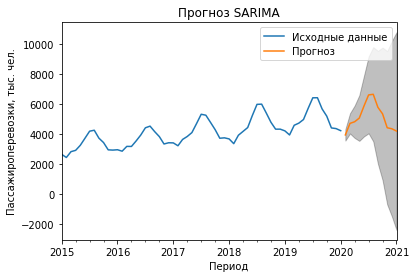

In [21]:
# Визуализируем прогноз:
ax = pass_data.plot(label='Исходные данные')
prediction.predicted_mean.plot(ax=ax, label='Прогноз')
ax.fill_between(prediction_int.index,
                prediction_int.iloc[:, 0],
                prediction_int.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Период')
ax.set_ylabel('Пассажироперевозки, тыс. чел.')
plt.legend()
plt.title('Прогноз SARIMA')

In [22]:
# Минимальные и максимальные значения прогноза:
print('\nМин. и макс. значения прогноза SARIMA (тыс. чел.):\n', prediction_int.round(2))


Мин. и макс. значения прогноза SARIMA (тыс. чел.):
             lower Passengers carried_thousands  \
2020-02-29                             3572.80   
2020-03-31                             4045.86   
2020-04-30                             3750.26   
2020-05-31                             3554.51   
2020-06-30                             3852.47   
2020-07-31                             4057.98   
2020-08-31                             3517.96   
2020-09-30                             2031.39   
2020-10-31                              940.60   
2020-11-30                             -676.95   
2020-12-31                            -1465.56   
2021-01-31                            -2374.16   

            upper Passengers carried_thousands  
2020-02-29                             4330.28  
2020-03-31                             5393.34  
2020-04-30                             5906.36  
2020-05-31                             6592.28  
2020-06-30                             7887.53  
20

In [23]:
forecast2 = decomposition.forecast(12)
print('\nБазовый прогноз SARIMA (тыс. чел.):\n', forecast2.round(2))


Базовый прогноз SARIMA (тыс. чел.):
 2020-02-29    3951.54
2020-03-31    4719.60
2020-04-30    4828.31
2020-05-31    5073.40
2020-06-30    5870.00
2020-07-31    6614.57
2020-08-31    6656.70
2020-09-30    5789.66
2020-10-31    5354.98
2020-11-30    4427.52
2020-12-31    4361.69
2021-01-31    4207.00
Freq: M, dtype: float64


Text(0, 0.5, 'Пассажироперевозки, тыс. чел.')

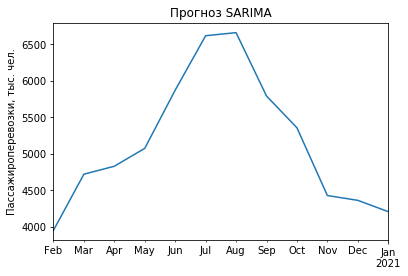

In [24]:
forecast2.plot()
plt.title('Прогноз SARIMA')
plt.ylabel('Пассажироперевозки, тыс. чел.')